In [15]:
import sys
sys.path.append('../src')

from module.linear import Linear
from loss.mse_loss import MSELoss
import numpy as np
import matplotlib.pyplot as plt

Création de données


In [5]:
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6]])
y = np.array([[0.5, 0.8],
              [0.2, 0.3]])

Creation des models


In [6]:
model = Linear(3, 2)

Definir les parametres d'apprentissage 

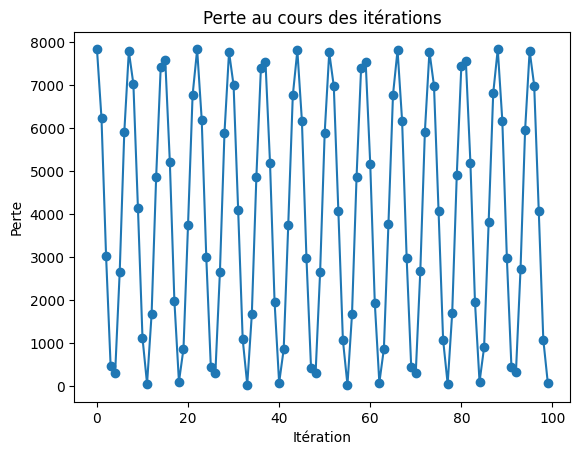

In [20]:
learning_rate = 0.1
n_iterations = 100

losses = []

# Boucle d'apprentissage
for i in range(n_iterations):
    # Calculer la sortie du modèle
    yhat = model.forward(X)

    # Calculer la perte
    loss_func = MSELoss()
    loss = loss_func.forward(y, yhat)
    losses.append(loss)

    # Calculer les gradients et mettre à jour les paramètres du modèle
    delta = loss_func.backward(y, yhat)
    model.backward_update_gradient(X, delta)
    model.update_parameters(gradient_step=learning_rate)

# Afficher les points et la courbe de la perte
plt.scatter(range(n_iterations), losses)
plt.plot(range(n_iterations), losses)
plt.title("Perte au cours des itérations")
plt.xlabel("Itération")
plt.ylabel("Perte")
plt.show()


In [7]:
yhat = model.forward(X)

In [8]:
loss_func = MSELoss()
loss = loss_func.forward(y, yhat)

In [9]:
print("Sortie du modèle :")
print(yhat)
print("Perte :")
print(loss)

Sortie du modèle :
[[0. 0.]
 [0. 0.]]
Perte :
1.02


In [12]:
delta = loss_func.backward(y, yhat)
model.backward_update_gradient(X, delta)
model.update_parameters(gradient_step=learning_rate)

In [14]:
print("Gradients :")
print(model._gradient)

Gradients :
[[-0.52 -0.8 ]
 [-0.8  -1.24]
 [-1.08 -1.68]]
